[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/carlos-adir/UnB-Courses/blob/main/vibracoes/System2Dofs.ipynb)

In [1]:
try:
    import numpy as np
    from matplotlib import pyplot as plt 
    from scipy.integrate import odeint
except ModuleNotFoundError:
    import os
    os.system("pip install numpy")
    os.system("pip install matplotlib")
    os.system("pip install scipy")
    from matplotlib import pyplot as plt 
    from scipy.integrate import odeint

In [2]:
m1, m2 = 100, 200
k1, k2 = 200, 550
M = [[m1, 0],
     [0, m2]]
invM = np.linalg.inv(M)
n = invM.shape[0]
K = [[k1+k2, -k2],
     [-k2, k2]]
C = [[1, -1],
     [-1, 2]]
C = 0.005*np.array(C)

In [3]:
def Force(y: np.ndarray, t: float):
    Amp, w = 10, 2
    F = np.zeros(n)
    F[1] = Amp*np.sin(w*t)
    return F

def dydt(y: np.ndarray, t: float):
    F = Force(y, t)
    return A @ y + B @ F

In [4]:
I = np.eye(n)
Z = np.zeros((n, n))
A = np.block([[Z, I],
              [-invM @ K, -invM @ C]])
B = np.block([[Z],
              [invM]])
u0 = np.random.rand(n)
v0 = np.random.rand(n)
Y0 = np.concatenate([u0, v0])

t = np.arange(0, 40, 0.1)
Y = odeint(dydt, Y0, t)
U = Y[:, :n].T
V = Y[:, n:].T

Text(0, 0.5, 'Position $x$ (m)')

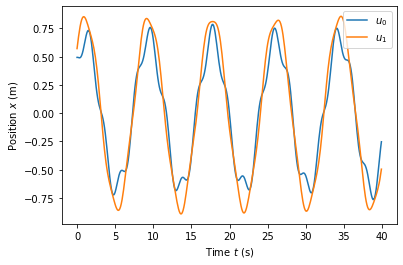

In [5]:
for i in range(n):
    plt.plot(t, U[i], label=f"$u_{i}$")
plt.legend()
plt.xlabel("Time $t$ (s)")
plt.ylabel("Position $x$ (m)")

Text(0, 0.5, 'Speed $x$ (m)')

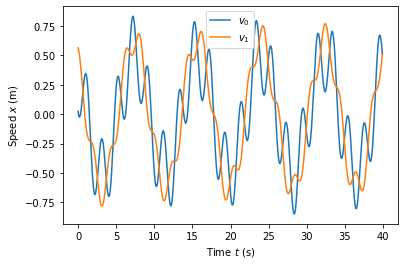

In [6]:
for i in range(n):
    plt.plot(t, V[i], label=f"$v_{i}$")
plt.legend()
plt.xlabel("Time $t$ (s)")
plt.ylabel("Speed $x$ (m)")